In [1]:
import pandas as pd
import numpy as np
import pdb, argparse
import os, pdb, math, itertools
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from kdutils.macro2 import *

In [17]:
method = 'cicso0'
instruments = 'ims'
period = 5
name = 'rigde'

In [18]:
dirs = os.path.join(base_path, method, instruments, 'temp', "model",
                        str(period))

In [19]:
filename = os.path.join(dirs, "{0}_predict_data.feather".format(name))

In [20]:
predict_data = pd.read_feather(filename)
predict_data.head()

,trade_time,code,nxt1_ret_5h,predict
0,2024-12-05 10:20:00,IM,-0.001860,0.000031
1,2024-12-05 10:21:00,IM,-0.000716,-0.000036
2,2024-12-05 10:22:00,IM,-0.001164,-0.000050
3,2024-12-05 10:23:00,IM,-0.000192,-0.000046
4,2024-12-05 10:24:00,IM,-0.000006,0.000021


In [7]:
is_on_mark = predict_data['trade_time'].dt.minute % int(period) == 0
predict_data = predict_data[is_on_mark]
predict_data.replace([np.inf, -np.inf], np.nan, inplace=True)
predict_data.dropna(inplace=True)
predict_data.head()

,trade_time,code,predict,nxt1_ret_5h
0,2024-12-05 10:20:00,IM,-1.824712,-0.001860
5,2024-12-05 10:25:00,IM,1.278022,-0.000206
10,2024-12-05 10:30:00,IM,0.347953,0.003050
15,2024-12-05 10:35:00,IM,0.362286,0.004669
20,2024-12-05 10:40:00,IM,-1.946536,0.000327


In [8]:
from lib.cux001 import FactorEvaluate1

In [12]:
evaluate1 = FactorEvaluate1(factor_data=predict_data,
                                factor_name='predict',
                                ret_name='nxt1_ret_{0}h'.format(period),
                                roll_win=240,
                                fee=0.000,
                                scale_method='roll_zscore',
                                expression=name)

In [13]:
stats_dt = evaluate1.run()

In [14]:
stats_dt

{'total_ret': 0.06602813101272154,
 'avg_ret': 2.3303018179318216e-05,
 'max_dd': -0.019663399486211874,
 'calmar': 3.3579204378683842,
 'sharpe1': 0.03220164726856916,
 'sharpe2': 3.471499776398589,
 'turnover': 0.35710521420532726,
 'win_rate': 0.46202321724709783,
 'profit_ratio': 1.1407139293515103,
 'ic_mean': 0.03925039478439194,
 'ic_std': 0.07511760885688347,
 'ic_ir': 0.5225192252747699,
 'factor_autocorr': -0.12937924497760753,
 'ret_autocorr': -0.037199780961824996}

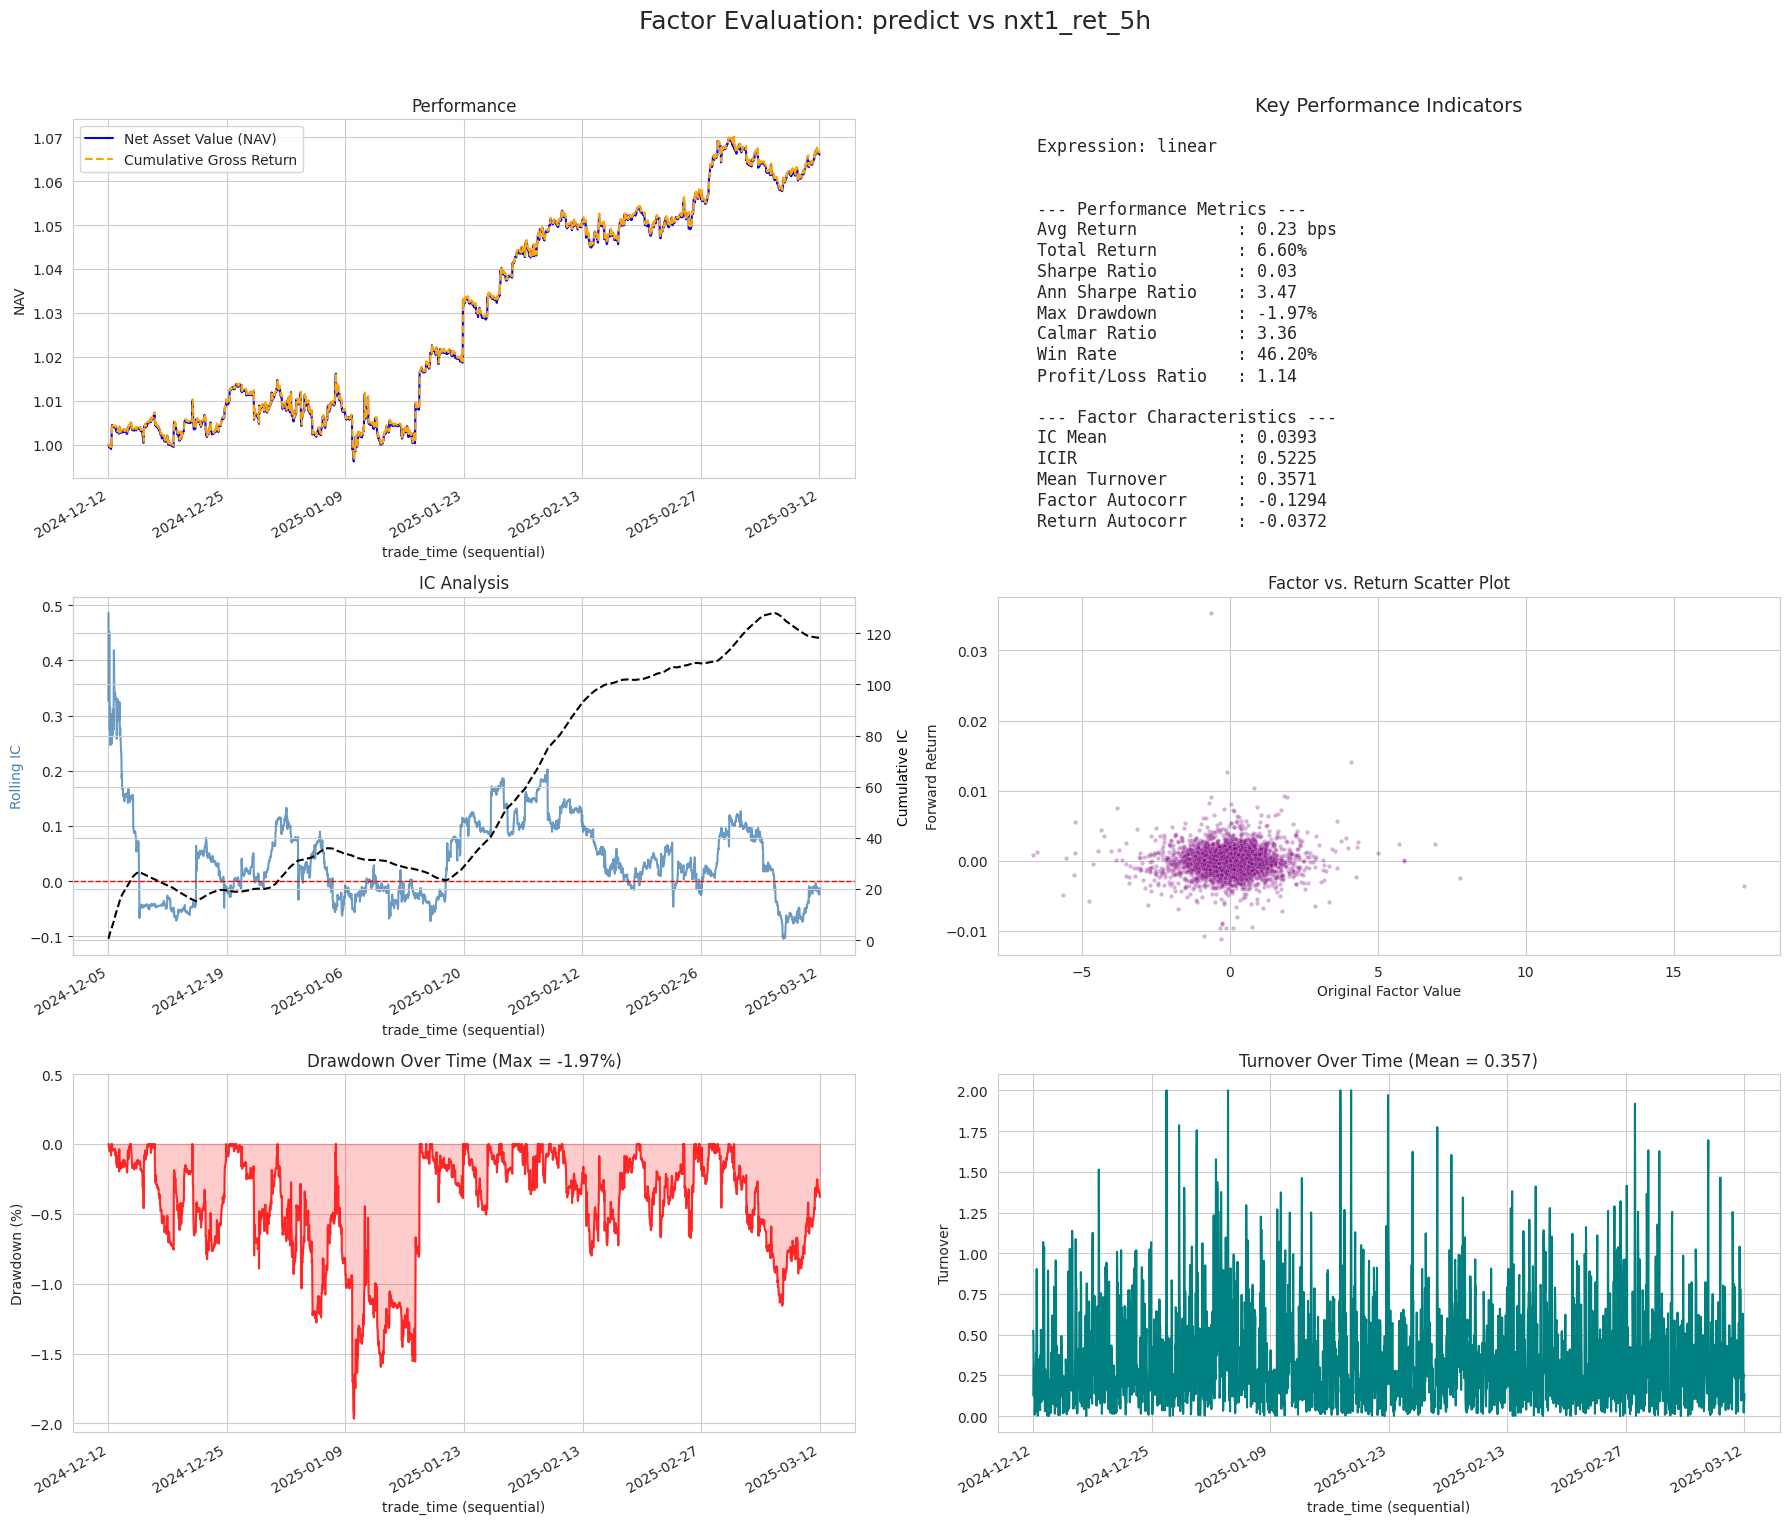

In [15]:
evaluate1.plot_results()